In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

/p/software/jusuf/stages/Devel-2019a/software/Python/3.6.8-GCCcore-8.3.0/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [2]:
naoindex=np.load("./PROJECT_training2005/HZG_Challenge/nao_index_train.npy")

In [4]:
naoindex.shape

(900,)

In [144]:
psl_train=np.load("./PROJECT_training2005/HZG_Challenge/psl_train.npy")

In [7]:
psl_train.shape

(900, 2322)

In [145]:
tas_train=np.load("./PROJECT_training2005/HZG_Challenge/tas_train.npy")

In [11]:
tas_train.shape

(900, 2322)

In [12]:
psl_train[1]

array([-3.33792646e-04,  4.57389206e-02,  8.39122236e-02, ...,
       -8.69666517e-01, -9.34885800e-01, -1.00357819e+00])

In [15]:
tas_train[1]

array([ 0.87799263,  0.74386078,  0.32858992, ..., -0.44455957,
       -0.13579775,  0.01122263])

In [21]:
from tensorflow import keras
from tensorflow.keras import layers

In [18]:
import tensorflow as tf


In [30]:
# reduce to 10 features
encoding_dim = 10

input_df = layers.Input(shape=(2322,))
encoded = layers.Dense(encoding_dim, activation='relu')(input_df)
decoded = layers.Dense(2322, activation='sigmoid')(encoded)

# encoder
autoencoder = keras.Model(input_df, decoded)

# intermediate result
encoder = keras.Model(input_df, encoded)

autoencoder.compile(optimizer='adadelta', loss='mean_squared_error')

autoencoder.fit(psl_train, psl_train,
                epochs=150,
                batch_size=256,
                shuffle=True)

Instructions for updating:
Use tf.cast instead.
Epoch 1/150
900/900 [==============================] - 2s 2ms/sample - loss: 1.2424
Epoch 2/150
900/900 [==============================] - 0s 73us/sample - loss: 1.2413
Epoch 3/150
900/900 [==============================] - 0s 86us/sample - loss: 1.2398
Epoch 4/150
900/900 [==============================] - 0s 188us/sample - loss: 1.2374
Epoch 5/150
900/900 [==============================] - 0s 102us/sample - loss: 1.2332
Epoch 6/150
900/900 [==============================] - 0s 181us/sample - loss: 1.2256
Epoch 7/150
900/900 [==============================] - 0s 76us/sample - loss: 1.2129
Epoch 8/150
900/900 [==============================] - 0s 87us/sample - loss: 1.1934
Epoch 9/150
900/900 [==============================] - 0s 194us/sample - loss: 1.1675
Epoch 10/150
900/900 [==============================] - 0s 91us/sample - loss: 1.1360
Epoch 11/150
900/900 [==============================] - 0s 99us/sample - loss: 1.1043
Epoch 12/150

In [31]:
encoded_psl_train = encoder.predict(psl_train)

In [32]:
encoded_psl_train.shape

(900, 10)

In [34]:
# reduce to 10 features
encoding_dim = 10

input_df = layers.Input(shape=(2322,))
encoded = layers.Dense(encoding_dim, activation='relu')(input_df)
decoded = layers.Dense(2322, activation='sigmoid')(encoded)

# encoder
autoencoder = keras.Model(input_df, decoded)

# intermediate result
encoder = keras.Model(input_df, encoded)

autoencoder.compile(optimizer='adam', loss='mean_squared_error')

autoencoder.fit(tas_train, tas_train,
                epochs=150,
                batch_size=256,
                shuffle=True)

Epoch 1/150
900/900 [==============================] - 0s 553us/sample - loss: 1.2423
Epoch 2/150
900/900 [==============================] - 0s 81us/sample - loss: 1.2253
Epoch 3/150
900/900 [==============================] - 0s 79us/sample - loss: 1.1893
Epoch 4/150
900/900 [==============================] - 0s 113us/sample - loss: 1.1388
Epoch 5/150
900/900 [==============================] - 0s 91us/sample - loss: 1.0891
Epoch 6/150
900/900 [==============================] - 0s 138us/sample - loss: 1.0485
Epoch 7/150
900/900 [==============================] - 0s 105us/sample - loss: 1.0184
Epoch 8/150
900/900 [==============================] - 0s 118us/sample - loss: 0.9979
Epoch 9/150
900/900 [==============================] - 0s 96us/sample - loss: 0.9822
Epoch 10/150
900/900 [==============================] - 0s 96us/sample - loss: 0.9692
Epoch 11/150
900/900 [==============================] - 0s 88us/sample - loss: 0.9580
Epoch 12/150
900/900 [==============================] - 0s

In [35]:
encoded_tas_train = encoder.predict(tas_train)

In [37]:
predictors=np.concatenate((encoded_psl_train,encoded_tas_train),axis=1)

In [38]:
predictors.shape

(900, 20)

# sequential split

In [121]:
X_train_seq, X_test_seq = np.split(predictors, [int(.80 *len(predictors))])

In [122]:
 y_train_seq, y_test_seq = np.split(naoindex, [int(.80 *len(naoindex))])

In [131]:
y_train_seq.shape

(720,)

## models

In [39]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split

/p/software/jusuf/stages/Devel-2019a/software/Python/3.6.8-GCCcore-8.3.0/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [40]:
X_train, X_test, y_train, y_test = train_test_split(predictors,naoindex, random_state=1)

In [41]:
regr = MLPRegressor(random_state=1, max_iter=500).fit(X_train, y_train)

/p/project/training2005/jupyter/kernels/datathon/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [42]:
regr.predict(X_test[:2])

array([-1.97541055, -0.24470582])

In [119]:
pred=regr.predict(X_test)

In [43]:
regr.score(X_test, y_test)

-2.63271066054771

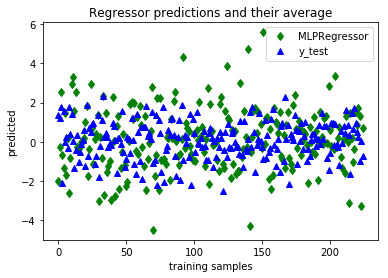

In [120]:
plt.figure()
plt.plot(pred, 'gd', label='MLPRegressor')
plt.plot(y_test,'b^',label ='y_test')


plt.ylabel('predicted')
plt.xlabel('training samples')
plt.legend(loc="best")
plt.title('Regressor predictions and their average')

plt.show()

In [123]:
# sequential 

In [125]:
regr = MLPRegressor(random_state=1, max_iter=1000).fit(X_train_seq, y_train_seq)
pred=regr.predict(X_test_seq)
regr.score(X_test_seq, y_test_seq)

-2.097382495288352

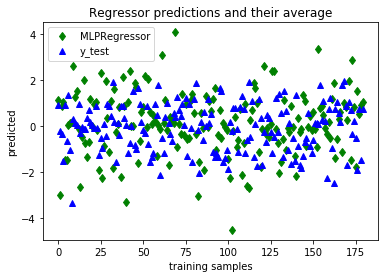

In [126]:
plt.figure()
plt.plot(pred, 'gd', label='MLPRegressor')
plt.plot(y_test_seq,'b^',label ='y_test')


plt.ylabel('predicted')
plt.xlabel('training samples')
plt.legend(loc="best")
plt.title('Regressor predictions and their average')

plt.show()

## gradient boosting

In [44]:
from sklearn.ensemble import GradientBoostingRegressor


/p/software/jusuf/stages/Devel-2019a/software/Python/3.6.8-GCCcore-8.3.0/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/p/software/jusuf/stages/Devel-2019a/software/Python/3.6.8-GCCcore-8.3.0/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/p/software/jusuf/stages/Devel-2019a/software/Python/3.6.8-GCCcore-8.3.0/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [45]:
reg = GradientBoostingRegressor(random_state=0)
reg.fit(X_train, y_train)

GradientBoostingRegressor(random_state=0)

In [46]:
reg.predict(X_test[:2])

array([ 0.1652062 , -0.13472369])

In [48]:
reg.score(X_test, y_test)

-0.1380428610714477

# voting

In [98]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import VotingRegressor

In [103]:
reg2 = RandomForestRegressor(random_state=1, n_estimators=10)
reg3 = LinearRegression()

reg2.fit(X_train, y_train)
reg3.fit(X_train, y_train)

ereg = VotingRegressor(estimators=[('gb', reg), ('rf', reg2), ('lr', reg3)])
ereg = ereg.fit(X_train, y_train)

In [104]:
ereg.predict(X_test[:2])

array([ 0.28242519, -0.00906336])

In [105]:
ereg.score(X_test, y_test)

-0.06467965294303402

In [106]:
pred1 = reg.predict(X_test)
pred2 = reg2.predict(X_test)
pred3 = reg3.predict(X_test)
pred4 = ereg.predict(X_test)

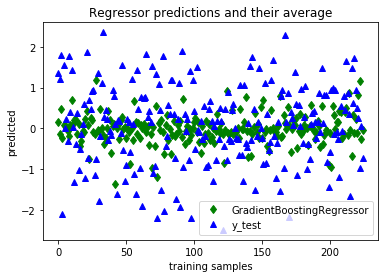

In [108]:
plt.figure()
plt.plot(pred1, 'gd', label='GradientBoostingRegressor')
plt.plot(y_test,'b^',label ='y_test')


plt.ylabel('predicted')
plt.xlabel('training samples')
plt.legend(loc="best")
plt.title('Regressor predictions and their average')

plt.show()

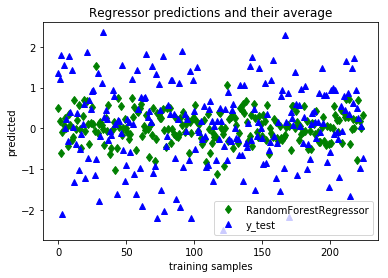

In [110]:
plt.figure()
plt.plot(pred2, 'gd', label='RandomForestRegressor')
plt.plot(y_test,'b^',label ='y_test')


plt.ylabel('predicted')
plt.xlabel('training samples')
plt.legend(loc="best")
plt.title('Regressor predictions and their average')

plt.show()

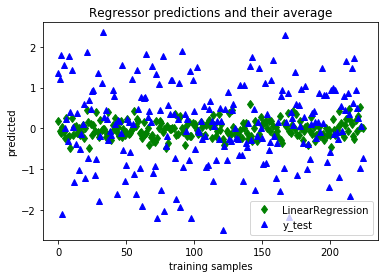

In [111]:
plt.figure()
plt.plot(pred3, 'gd', label='LinearRegression')
plt.plot(y_test,'b^',label ='y_test')


plt.ylabel('predicted')
plt.xlabel('training samples')
plt.legend(loc="best")
plt.title('Regressor predictions and their average')

plt.show()

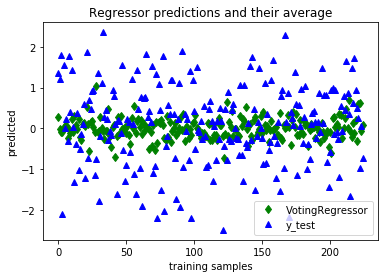

In [112]:
plt.figure()
plt.plot(pred4, 'gd', label='VotingRegressor')
plt.plot(y_test,'b^',label ='y_test')


plt.ylabel('predicted')
plt.xlabel('training samples')
plt.legend(loc="best")
plt.title('Regressor predictions and their average')

plt.show()



## Stacking

In [114]:
from sklearn.linear_model import RidgeCV, LassoCV
from sklearn.svm import SVR
estimators = [('ridge', RidgeCV()),
               ('lasso', LassoCV(random_state=42)),
               ('svr', SVR(C=1, gamma=1e-6))]

In [115]:
from sklearn.ensemble import StackingRegressor
reg = StackingRegressor(
     estimators=estimators,
     final_estimator=GradientBoostingRegressor(random_state=42))

In [116]:
reg.fit(X_train, y_train)

StackingRegressor(estimators=[('ridge',
                               RidgeCV(alphas=array([ 0.1,  1. , 10. ]))),
                              ('lasso', LassoCV(random_state=42)),
                              ('svr', SVR(C=1, gamma=1e-06))],
                  final_estimator=GradientBoostingRegressor(random_state=42))

In [117]:
y_pred = reg.predict(X_test)
from sklearn.metrics import r2_score
print('R2 score: {:.2f}'.format(r2_score(y_test, y_pred)))

R2 score: -0.02


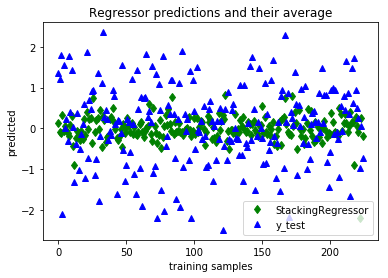

In [118]:
plt.figure()
plt.plot(y_pred, 'gd', label='StackingRegressor')
plt.plot(y_test,'b^',label ='y_test')


plt.ylabel('predicted')
plt.xlabel('training samples')
plt.legend(loc="best")
plt.title('Regressor predictions and their average')

plt.show()


In [146]:
psl_train, psl_test = np.split(psl_train, [int(.80 *len(psl_train))])

In [129]:
psl_train.shape

(720, 2322)

In [147]:
tas_train, tas_test = np.split(tas_train, [int(.80 *len(tas_train))])

In [149]:
psl_train_re=psl_train[:, :, np.newaxis]
tas_train_re=tas_train[:,:,np.newaxis]

In [158]:
psl_test_re=psl_test[:, :, np.newaxis]
tas_test_re=tas_test[:,:,np.newaxis]

## TWO STREAM CNN

In [154]:
verbose, epochs, batch_size = 2, 10, 32


input_1=(keras.Input((2322,1)))
model_1 = layers.Conv1D(32, kernel_size= 3 , strides=1, activation='relu')(input_1)
model_1 = layers.MaxPooling1D(pool_size= 2)(model_1)
model_1 = layers.Flatten()(model_1)
model_1 = layers.Dense(10 , activation='relu')(model_1)

input_2=(keras.Input((2322,1)))

model_2 = layers.Conv1D(32, kernel_size= 3 , strides=1, activation='relu')(input_2)
model_2 = layers.MaxPooling1D(pool_size= 2)(model_2)
model_2 = layers.Flatten()(model_2)
model_2 = layers.Dense(10 , activation='relu')(model_2)

merged = layers.Concatenate()([model_1, model_2])
output = layers.Dense(1)(merged)

model_final = keras.Model(inputs=[input_1,input_2], outputs=[output])


In [155]:
model_final.compile(loss='mse', optimizer='adam', metrics=['accuracy'])


In [156]:
model_final.fit([psl_train_re,tas_train_re],y_train_seq,epochs=epochs, batch_size=batch_size, verbose=verbose)

Epoch 1/10
 - 3s - loss: 2.6611 - acc: 0.0000e+00
Epoch 2/10
 - 2s - loss: 0.9803 - acc: 0.0000e+00
Epoch 3/10
 - 2s - loss: 0.9794 - acc: 0.0000e+00
Epoch 4/10
 - 2s - loss: 0.9793 - acc: 0.0000e+00
Epoch 5/10
 - 2s - loss: 0.9793 - acc: 0.0000e+00
Epoch 6/10
 - 2s - loss: 0.9792 - acc: 0.0000e+00
Epoch 7/10
 - 2s - loss: 0.9791 - acc: 0.0000e+00
Epoch 8/10
 - 2s - loss: 0.9791 - acc: 0.0000e+00
Epoch 9/10
 - 2s - loss: 0.9790 - acc: 0.0000e+00
Epoch 10/10
 - 2s - loss: 0.9789 - acc: 0.0000e+00


In [159]:
model_final.evaluate([psl_test_re,tas_test_re],y_test_seq)

180/180 [==============================] - 0s 2ms/sample - loss: 1.1004 - acc: 0.0000e+00


[1.1004285838868884, 0.0]

### plots

In [51]:
psl_train[:10]

array([[-7.93245196e-01, -7.85977423e-01, -1.18881118e+00, ...,
         1.54037201e+00,  1.56117058e+00,  1.58677435e+00],
       [-3.33792646e-04,  4.57389206e-02,  8.39122236e-02, ...,
        -8.69666517e-01, -9.34885800e-01, -1.00357819e+00],
       [ 4.82843101e-01,  3.48313332e-01,  3.88171107e-01, ...,
        -5.29772162e-01, -5.90309680e-01, -6.52161241e-01],
       ...,
       [ 1.90229028e-01, -4.01041321e-02,  1.55332861e-02, ...,
         1.00652599e+00,  1.05772948e+00,  1.09788918e+00],
       [ 7.18406215e-02, -1.72892600e-01, -6.21451773e-02, ...,
        -7.19053090e-01, -7.08241463e-01, -6.89086139e-01],
       [ 2.42933139e-01,  2.13289365e-01,  4.19570714e-01, ...,
         1.48328257e+00,  1.52197063e+00,  1.56064737e+00]])

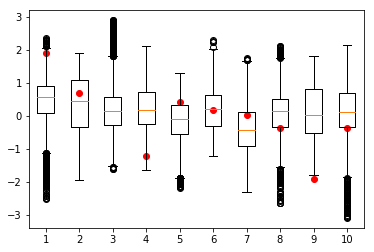

In [69]:
plt.boxplot(psl_train[:10].T)
plt.scatter(np.arange(1,11,1),naoindex[:10],color='r')

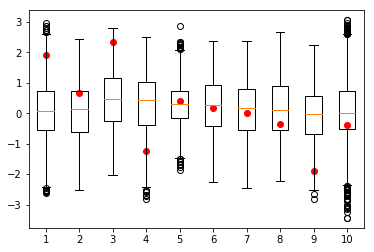

In [70]:
plt.boxplot(tas_train[:10].T)
plt.scatter(np.arange(1,11,1),naoindex[:10],color='r')

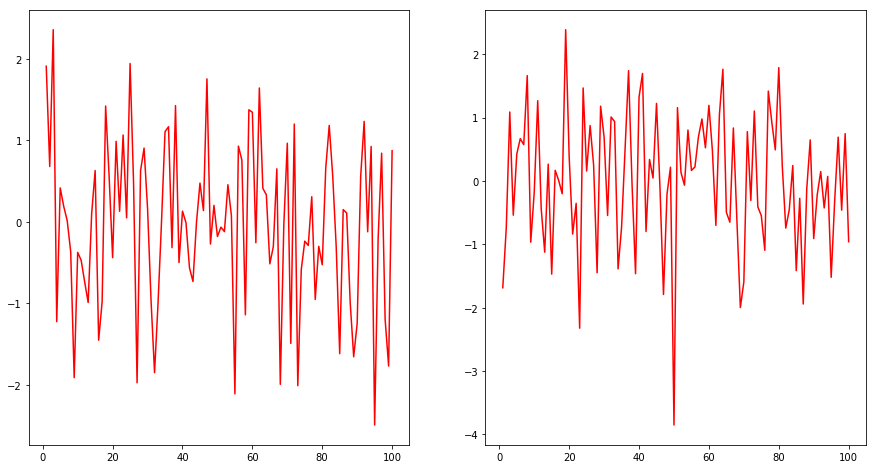

In [74]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(15,8))
ax1.plot(np.arange(1,101,1),naoindex[:100],color='r')
ax2.plot(np.arange(1,101,1),naoindex[100:200],color='r')

Text(0.5, 1.0, 'NAO Index over the years')

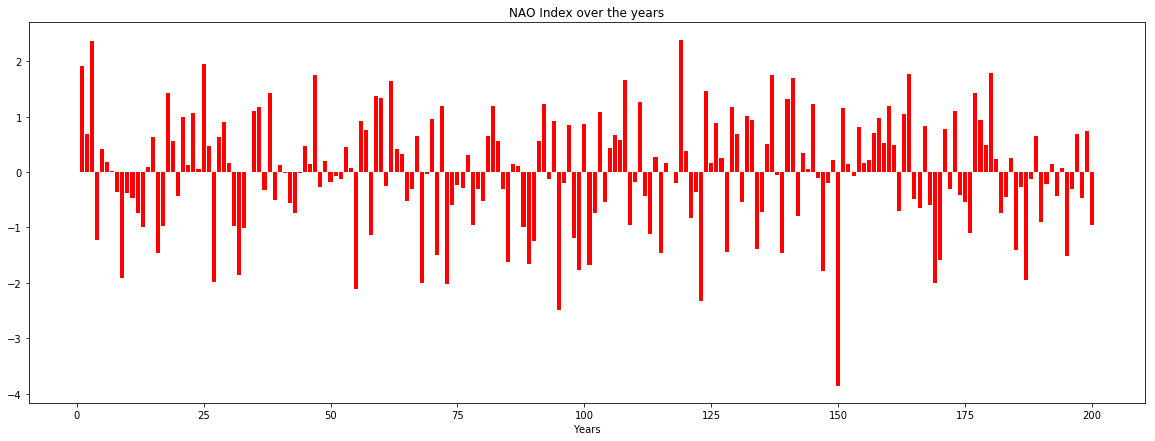

In [163]:
plt.subplots(figsize=(20,7))
plt.bar(np.arange(1,201,1),naoindex[:200],color='r')
plt.xlabel('Years')
plt.title('NAO Index over the years')

In [78]:
psl_reshape=psl_train[:1].reshape((54,43))

In [80]:
ps12_reshape=psl_train[2].reshape((54,43))

In [81]:
ps13_reshape=psl_train[3].reshape((54,43))

In [84]:
ps14_reshape=psl_train[4].reshape((54,43))

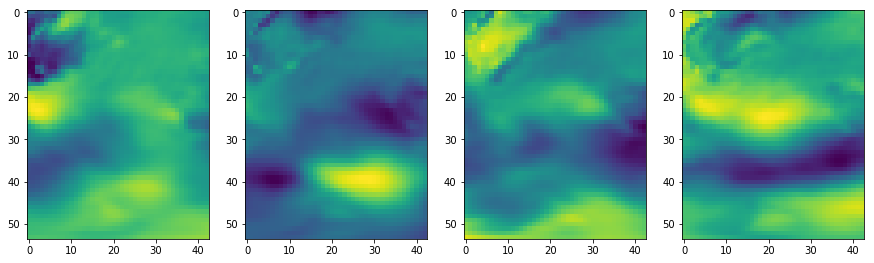

In [86]:
fig, (ax1,ax2,ax3,ax4) = plt.subplots(1,4,figsize=(15,7))
im = ax1.imshow(psl_reshape)
im2= ax2.imshow(ps12_reshape)
im3= ax3.imshow(ps13_reshape)
im4=ax4.imshow(ps14_reshape)

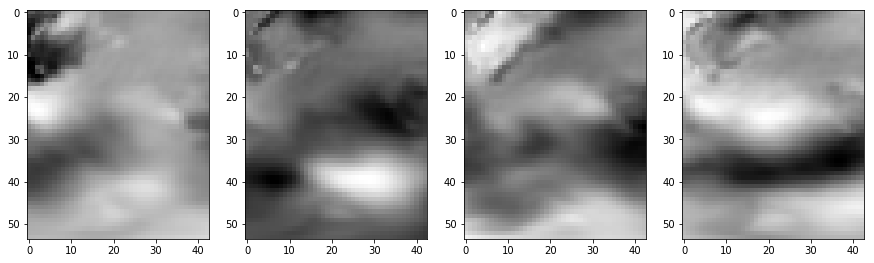

In [87]:
fig, (ax1,ax2,ax3,ax4) = plt.subplots(1,4,figsize=(15,7))
im = ax1.imshow(psl_reshape,cmap="gray")
im2= ax2.imshow(ps12_reshape,cmap="gray")
im3= ax3.imshow(ps13_reshape,cmap="gray")
im4=ax4.imshow(ps14_reshape,cmap="gray")

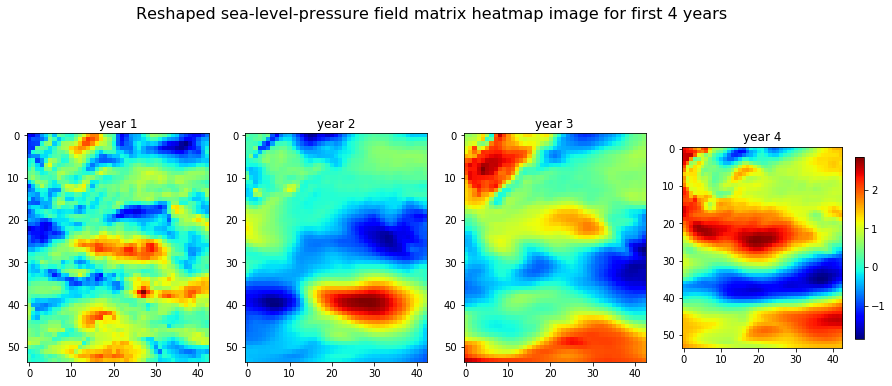

In [183]:
fig, (ax1,ax2,ax3,ax4) = plt.subplots(1,4,figsize=(15,7))
im = ax1.imshow(psl_reshape,cmap="jet")
ax1.set_title("year 1")
im2= ax2.imshow(ps12_reshape,cmap="jet")
ax2.set_title("year 2")
im3= ax3.imshow(ps13_reshape,cmap="jet")
ax3.set_title('year 3')
im4= ax4.imshow(ps14_reshape,cmap="jet")
ax4.set_title("year 4")
fig.suptitle('Reshaped sea-level-pressure field matrix heatmap image for first 4 years', fontsize=16)
fig.colorbar(im, fraction=0.05, pad=0.07)
plt.show()

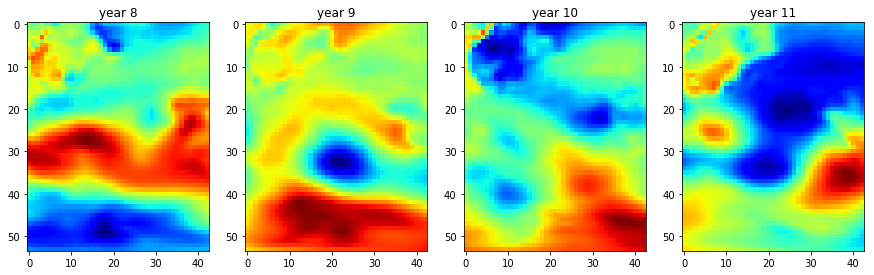

In [188]:
fig, axes = plt.subplots(1,4,figsize=(15,7))
num =[8,9,10,11]
for i,ax in zip(num,axes):
    psl_reshape=psl_train[i].reshape((54,43))
    im = ax.imshow(psl_reshape,cmap="jet")
    ax.set_title("year "+str(i))

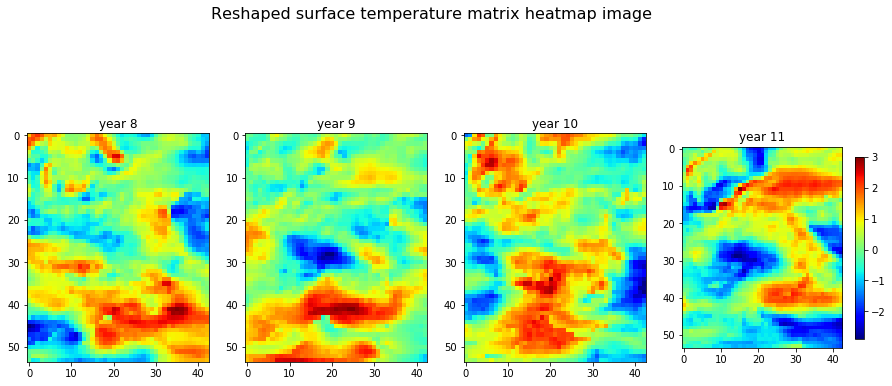

In [189]:
fig, axes = plt.subplots(1,4,figsize=(15,7))
num =[8,9,10,11]
for i,ax in zip(num,axes):
    psl_reshape=tas_train[i].reshape((54,43))
    im = ax.imshow(psl_reshape,cmap="jet")
    ax.set_title("year "+str(i))
fig.suptitle('Reshaped surface temperature matrix heatmap image', fontsize=16)
fig.colorbar(im, fraction=0.05, pad=0.07)
plt.show()

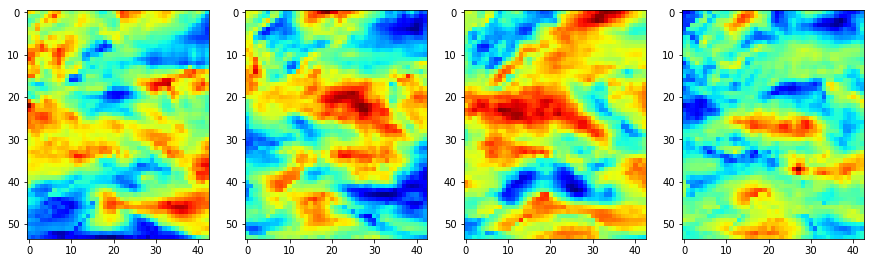

In [165]:
fig, axes = plt.subplots(1,4,figsize=(15,7))
num =[1,2,3,4]
for i,ax in zip(num,axes):
    psl_reshape=tas_train[i].reshape((54,43))
    im = ax.imshow(psl_reshape,cmap="jet")